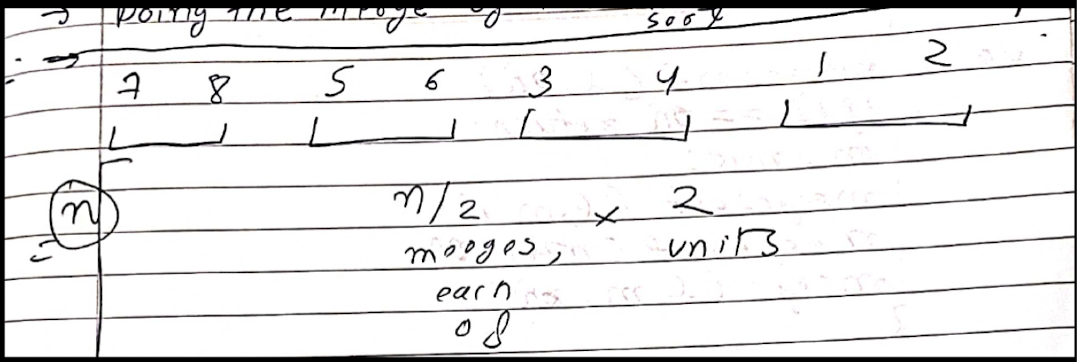

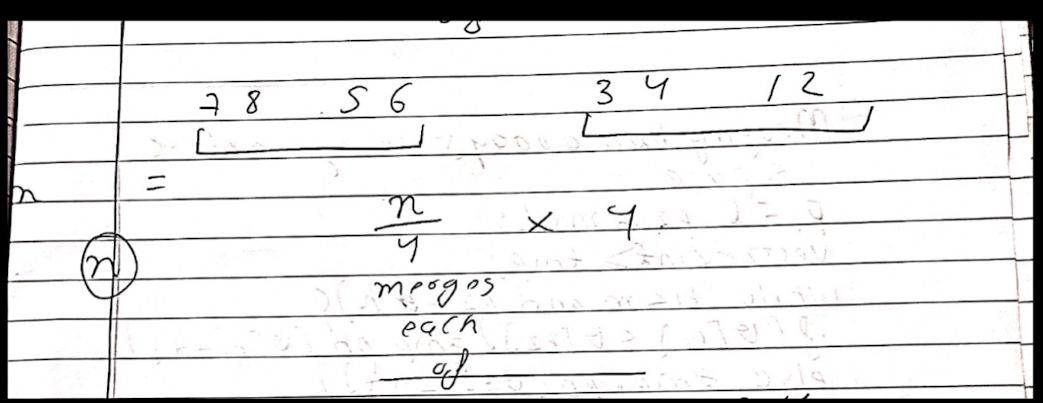

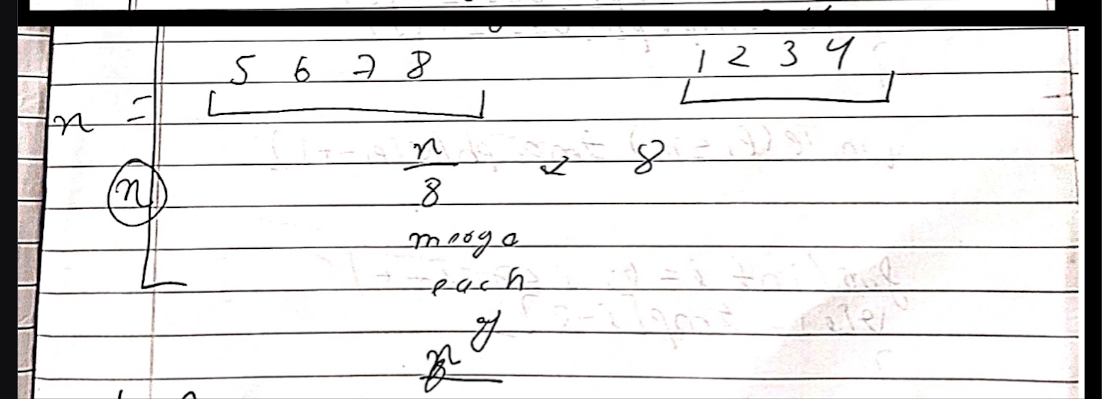

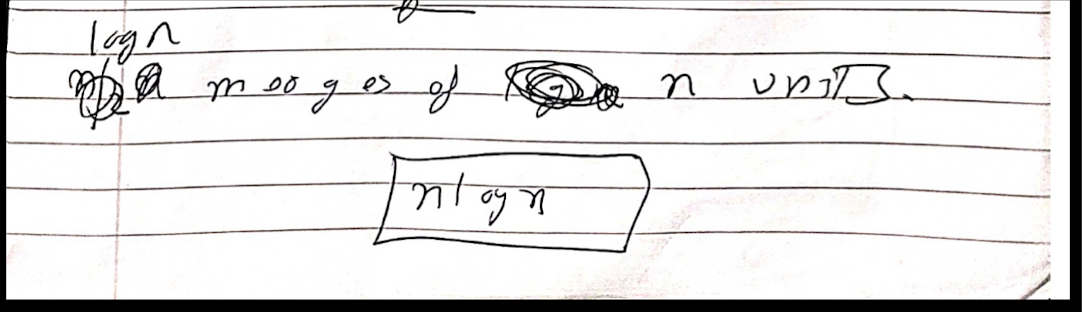

In [ ]:
void mergeSort(int v[], int l, int r){
    if(l==r) return;
    int m=(l+r)/2;
    mergeSort(v,l,m);
    mergeSort(v,m+1,r);
    merge(v,l,m,r);
}

1. Merging two sorted arrays using extra space, a problem exist where your goal is to merge two sorted arrays in constant space

In [ ]:
void merge(int v[], int l, int m, int r){
    int p1=l,p2=m+1;
    vector<int> temp;
    while(p1<=m and p2<=r){
        if(v[p1]<=v[p2]) temp.push_back(v[p1++]);
        else temp.push_back(v[p2++]);
    }
    while(p1<=m) temp.push_back(v[p1++]);
    while(p2<=r) temp.push_back(v[p2++]);
    for(int i=l;i<=r;i++){
        v[i]=temp[i-l];
    }
}

An is problem exist of merging two arrays in constant space.

# Merging multiple vectors together

https://www.geeksforgeeks.org/problems/merge-k-sorted-arrays/1

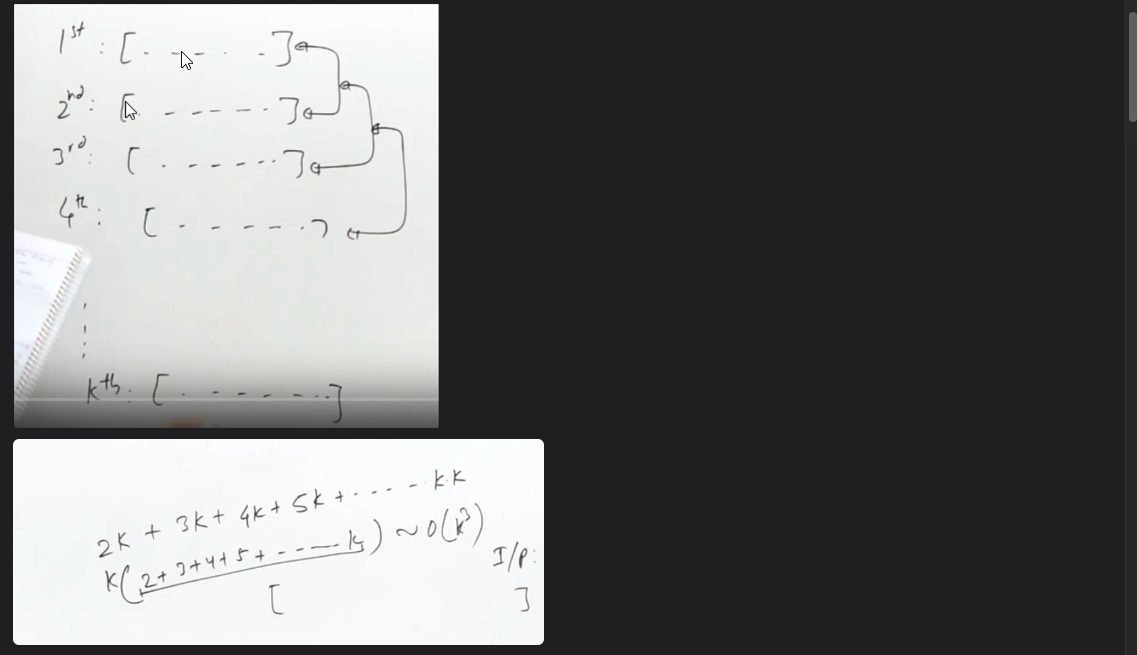

Brute Force
    nklog(nk)

which is better then above dimaag wali approach

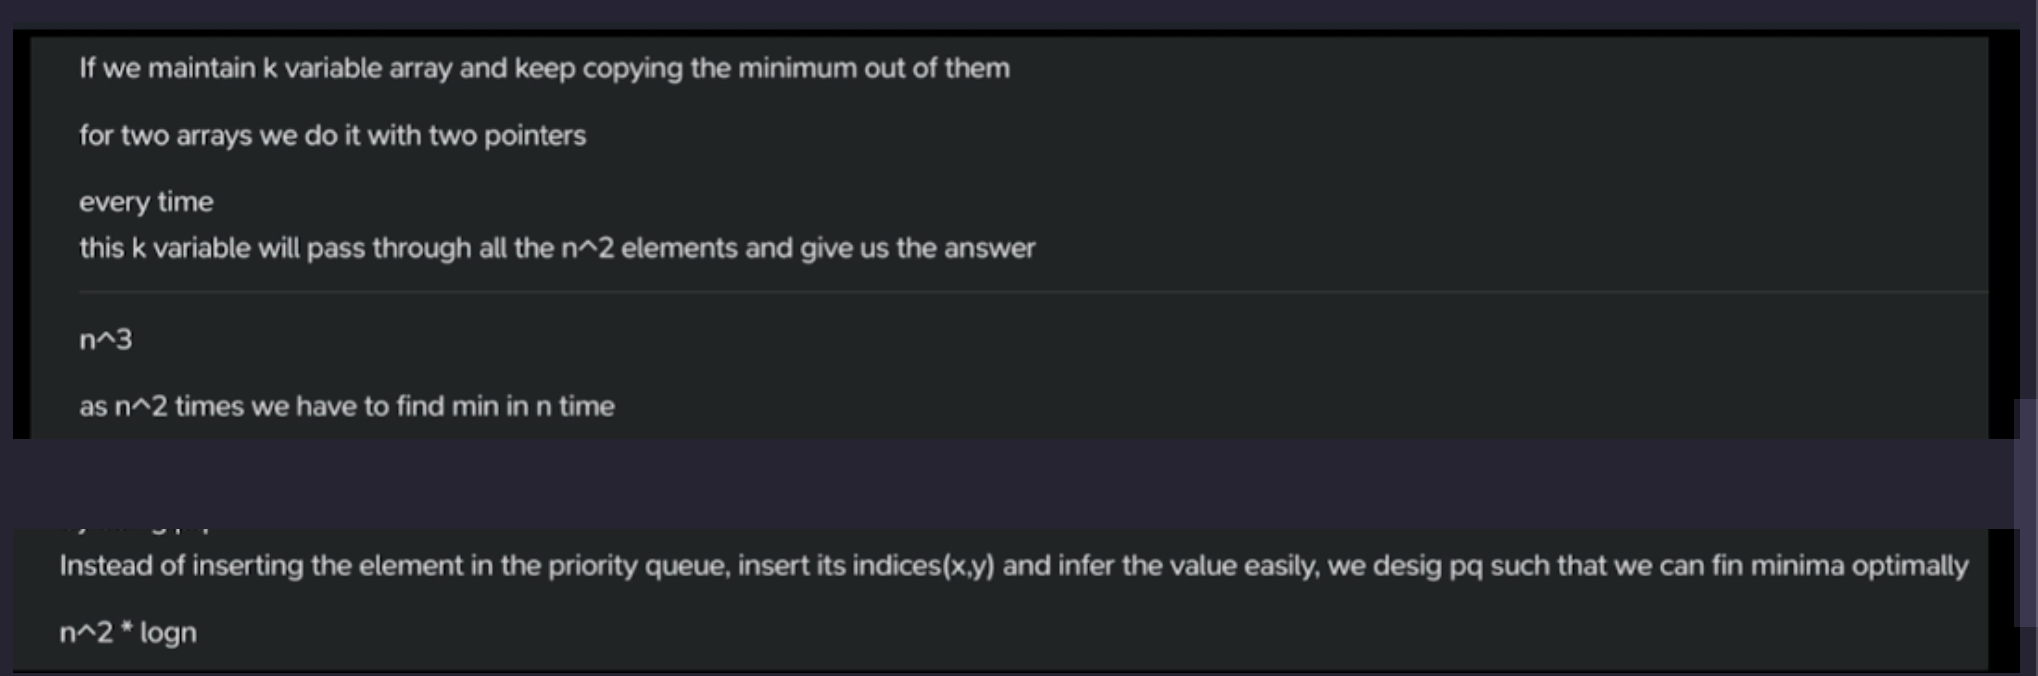

same as recursive approach

In [ ]:
vector<int> f(vector<vector<int>> &ma, int l ,int h){
    if(l==h) return ma[l];
    int m=(l+h)/2;
    vector<int> v1=f(ma,l,m);
    vector<int> v2=f(ma,m+1,h);
    return merge(v1,v2);
}

public:
vector<int> mergeKArrays(vector<vector<int>> ma, int n){
    return f(ma,0,n-1);
}

In [ ]:
vector<int> merge(vector<int>& v1, vector<int>& v2){
    int n1=v1.size();
    int n2=v2.size();
    vector<int> tmp;
    int i=0,j=0;
    while(i<n1 and j<n2){
        if(v1[i]<v2[j]) tmp.push_back(v1[i++]);
        else tmp.push_back(v2[j++]);
    }
    while(i<n1) tmp.push_back(v1[i++]);
    while(j<n2) tmp.push_back(v2[j++]);
    return tmp;
}

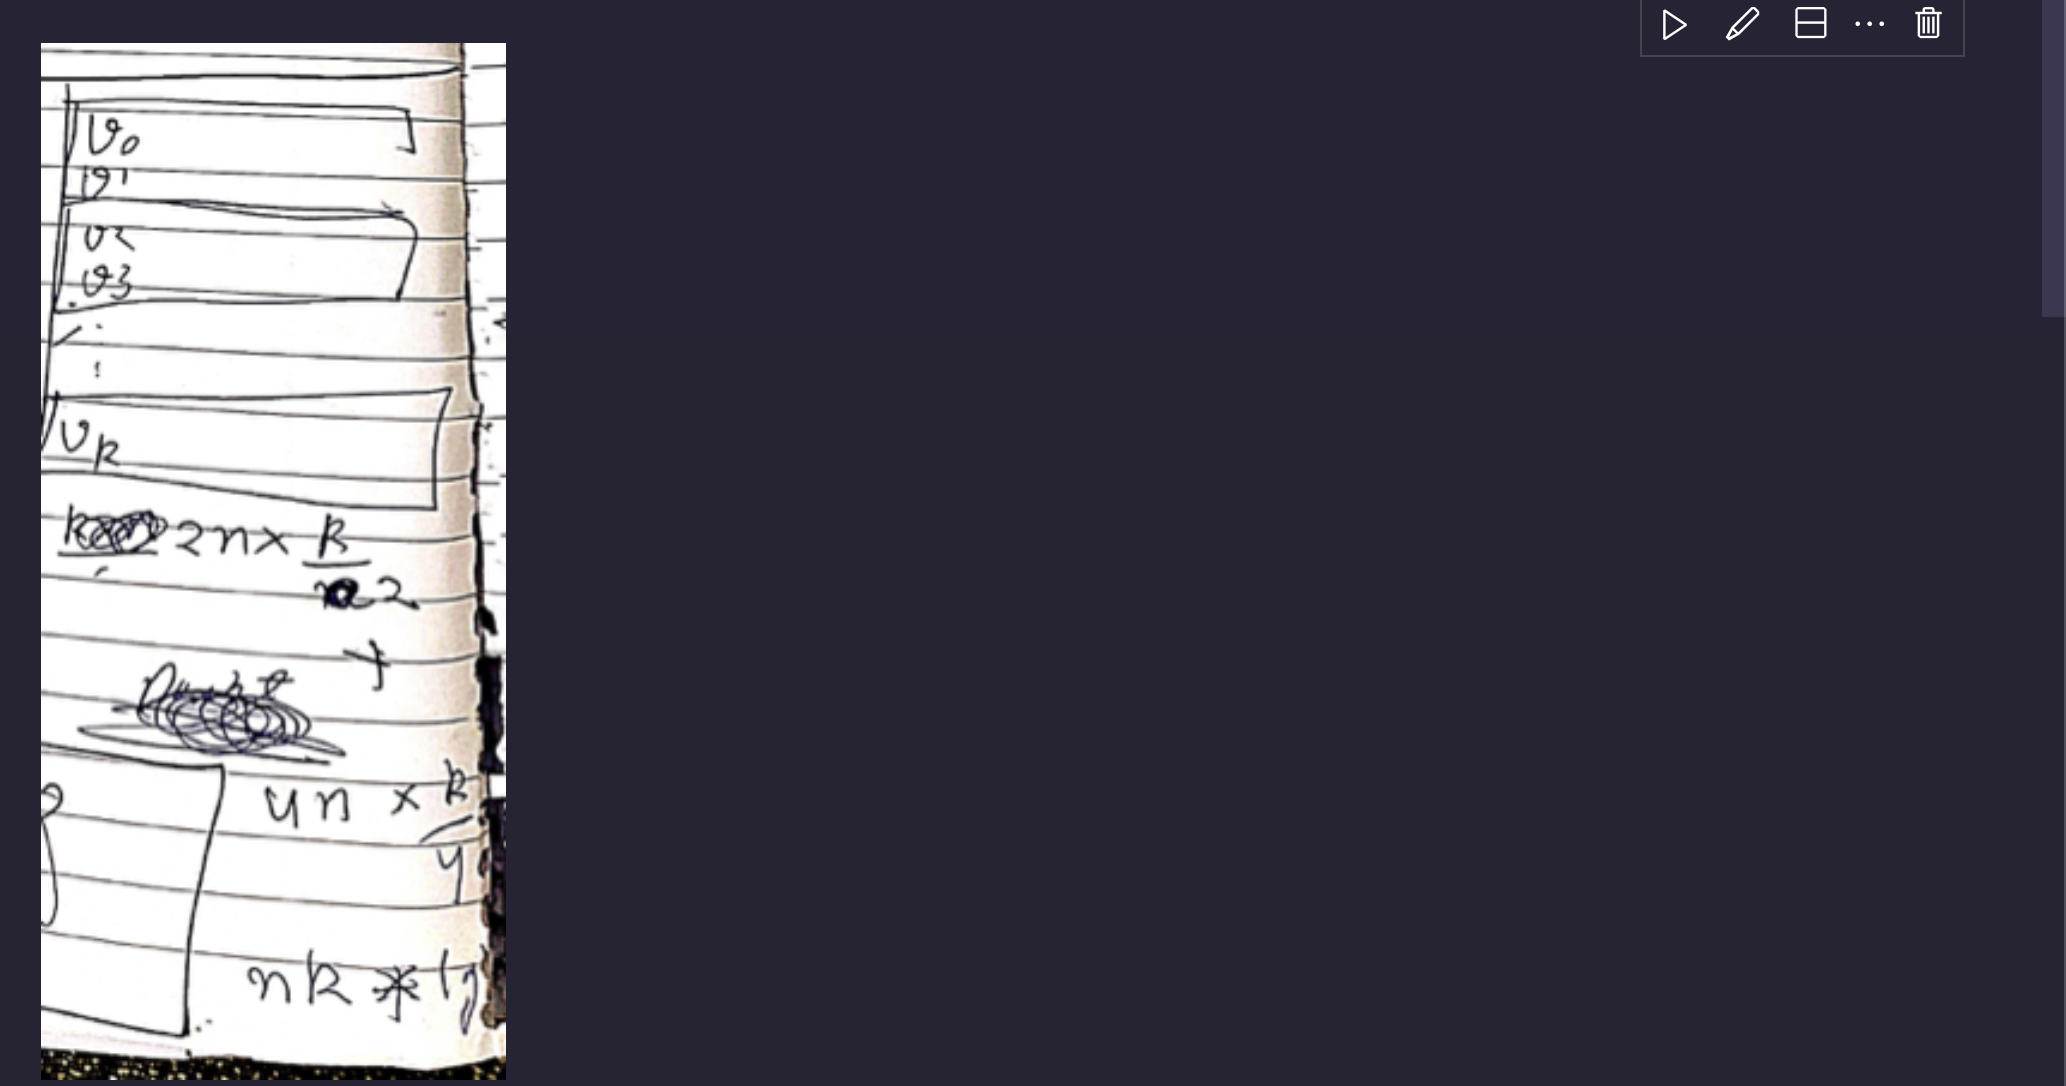

[Sangam](/Users/tarunmali/yTM/code/cpp/1/1Algorithms/993SangamTpMmPQMergeSort/2Merge/1.ipynb)

Merging matrix of row wise sorted vector of pairs

https://leetcode.com/problems/employee-free-time/description/?envType=list&envId=ppzcw7vd

In [ ]:
bool f(vector<int> &v1, vector<int> &v2){
    return min(v1[1],v2[1])>=max(v1[0],v2[0]);
}

vector<vector<int>> intervalIntersection(vector<vector<int>>& v1, vector<vector<int>>& v2) {
    vector<vector<int>> ans;
    int n1=v1.size(),n2=v2.size();
    int i=0,j=0;
    while(i<n1 and j<n2){
        if(f(v1[i],v2[j])) ans.push_back({max(v1[i][0],v2[j][0]),min(v1[i][1],v2[j][1])});
        if(v1[i][1]<v2[j][1]) i++;
        else j++;
    }
    return ans;
    
}

In [ ]:
/*
// Definition for an Interval.
class Interval {
public:
    int start;
    int end;

    Interval() {}

    Interval(int _start, int _end) {
        start = _start;
        end = _end;
    }
};
*/

class Solution {
    void addInterval(vector<Interval>& ans, Interval& cur) {
        if (ans.empty() or ans.back().end < cur.start) {
            ans.push_back(cur);
        } else {
            ans.back().end = max(ans.back().end, cur.end);
        }
    }

    vector<Interval> intervalUnion(vector<Interval>& v1, vector<Interval>& v2) {
        vector<Interval> ans;
        int i = 0, j = 0;

        while (i < v1.size() and j < v2.size()) {
            if (v1[i].start < v2[j].start) {
                addInterval(ans, v1[i]);
                i++;
            } else {
                addInterval(ans, v2[j]);
                j++;
            }
        }

        while (i < v1.size()){
            addInterval(ans, v1[i]);
            i++;
        }
        while (j < v2.size()){
            addInterval(ans, v2[j]);
            j++;
        } 

        return ans;
    }

    vector<Interval> f(vector<vector<Interval>> &ma, int l ,int h){
        if(l==h) return ma[l];
        int m=(l+h)/2;
        vector<Interval> v1=f(ma,l,m);
        vector<Interval> v2=f(ma,m+1,h);
        return intervalUnion(v1,v2);
    }

    void buildEmployeeFreeTime(vector<Interval> &mergedIntervals,vector<Interval> &ans){
        Interval prev=mergedIntervals[0];
        for(int i=1;i<mergedIntervals.size();i++){
            Interval cur=mergedIntervals[i];
            if(prev.end<cur.start){
                ans.push_back(Interval(prev.end,cur.start));
            }
            prev=cur;
        }
    }

    public:
    vector<Interval> employeeFreeTime(vector<vector<Interval>> ma) {
        int n=ma.size();
        vector<Interval> mergedIntervals=f(ma,0,n-1);
        vector<Interval> ans;
        buildEmployeeFreeTime(mergedIntervals,ans);
        return ans;
    }
};